## E-Commerce - Linear Regression and K-Means



</h3> 

In [2]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# getting the path of the file
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
# ignore warning for the distplot, which is deprecated, but allows for a better viz of the histogram and kde line

import warnings
warnings.filterwarnings('ignore')

In [4]:
# reading the dataset

ecomm = pd.read_csv('Ecommerce Customers.csv')
ecomm.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


***Description of each column, according to the dataset source***

**Avg. Session Length:** Average session of in-store style advice sessions.

**Time on App:** Average time spent on App in minutes

**Time on Website:** Average time spent on Website in minutes

**Length of Membership:** How many years the customer has been a member.

In [5]:
ecomm.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 141.1 KB


In [6]:
# data types are OK. Confirming that there are no null values:

ecomm.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [7]:
ecomm.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
# dropping the 'Avatar' column

ecomm = ecomm.drop('Avatar', axis=1)

# checking the 'Address' columns, it looks like some records do not have the state available

ecomm.Address.str.split(',',expand=True).sample(10)

,0,1
106,399 Jeremy Skyway Suite 377\nNorth Keithville,IL 55074
357,0833 Brian Canyon Suite 566\nAnthonymouth,VT 01329-7541
298,581 Gilmore Port\nHeatherville,MS 20879
418,11430 Meza Green Suite 037\nMartinezborough,FL 40624-8726
198,1576 Lane Shoal\nRogerton,PR 63867-3426
232,496 Bush Turnpike Apt. 674\nDonnabury,OR 32596-0079
200,338 Graham Loaf Suite 236\nEast Toddton,FM 43566-4238
337,157 Linda Roads\nNew Jimmyshire,MH 51942
264,06392 Matthew Viaduct Suite 000\nLake Ronald,NY 45787-0181
74,10022 Wilson Orchard Suite 107\nHarrisstad,MH 99272


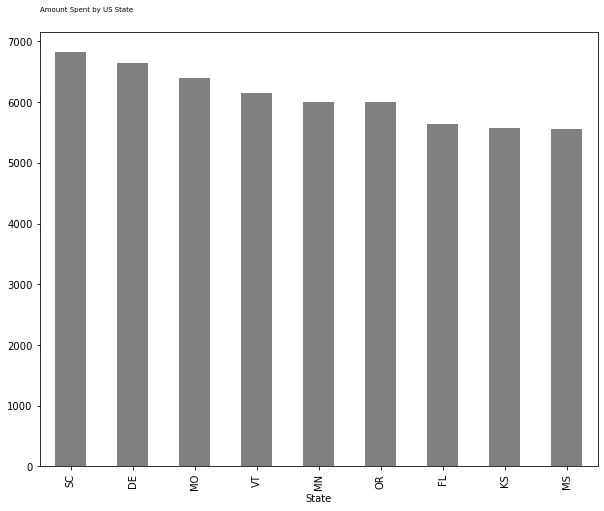

In [9]:
# plotting for columns that have, for illustrative purposes only

ecomm['State'] = ecomm.Address.str.split(',', expand=True)[1].str.split(' ', expand=True)[1]
ecomm = ecomm[['Email', 'Address', 'State', 'Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']] # rearranging columns
plt.figure(figsize=(10,8))
ecomm.groupby('State').sum()['Yearly Amount Spent'].sort_values(ascending=False)[1:10].plot(kind='bar', color='gray');
plt.title('Amount Spent by US State', loc='Left', fontsize=7, pad=20);

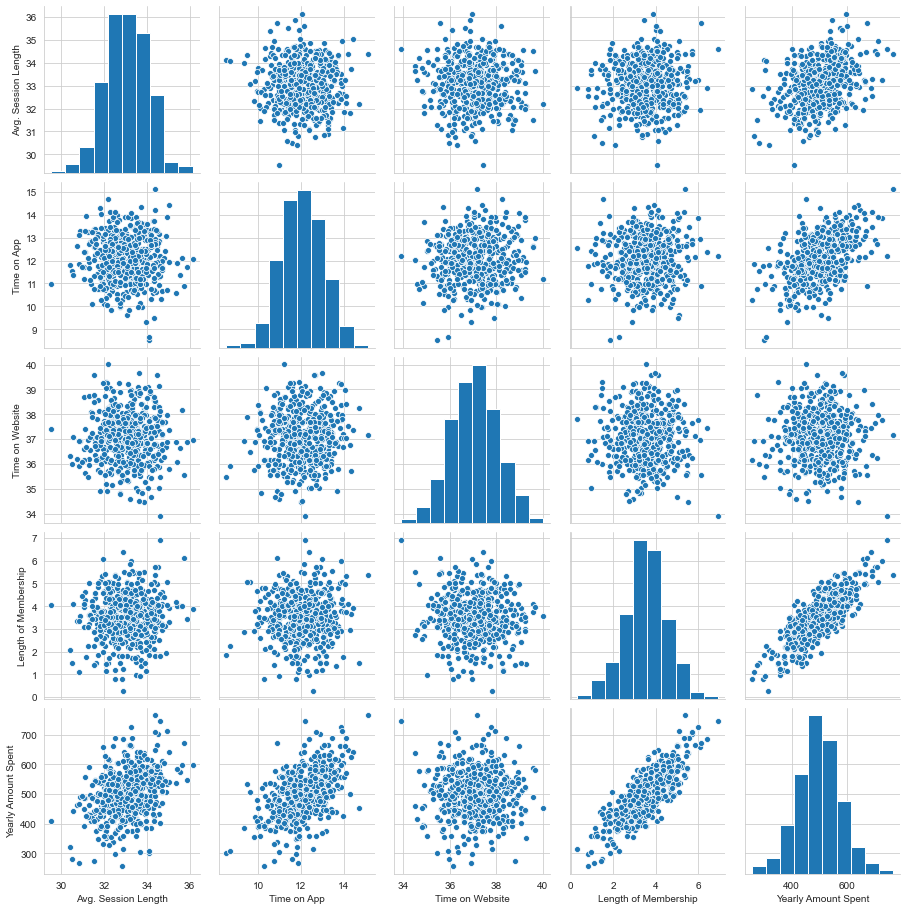

In [10]:
# relationships across the dataset

sns.set_style('whitegrid')
sns.pairplot(ecomm);

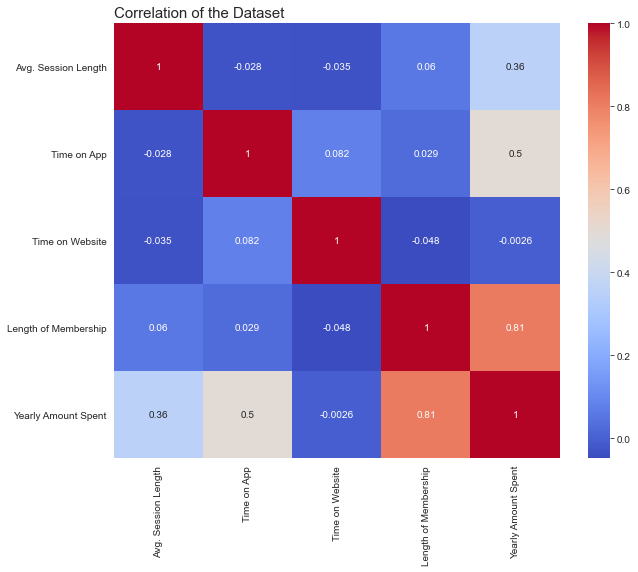

In [11]:
# heatmap for corr analysis

plt.figure(figsize=(10, 8))
sns.heatmap(ecomm.corr(),annot=True, cmap='coolwarm');
plt.title('Correlation of the Dataset', loc='left', fontsize=15);

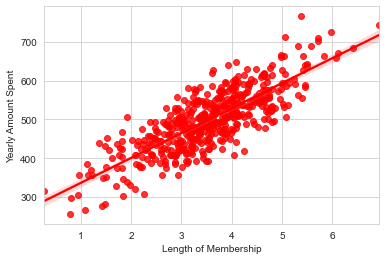

In [12]:
# length of membership vs. yearly amount spent

sns.regplot(data=ecomm, x='Length of Membership', y='Yearly Amount Spent', color='r');

### Preprocessing and Modeling

In [13]:
from sklearn.model_selection import train_test_split

X = ecomm[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = ecomm['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

# printing the coefficients and score

print(f'Coefficients: {reg.coef_}. \nScore: {reg.score(X_train, y_train)}.')

Coefficients: [26.15781139 38.63547414  0.89314158 60.87185628]. 
Score: 0.9837814779923577.


### Predicting and Evaluating the Linear Model

In [15]:
# calculating the metrics - I'll use the MAE, MSE, RMSE. And also print the explained variance score (R^2) again, just so they're together.

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
predictions = reg.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rsqrt = explained_variance_score(y_test, predictions)

print('MAE: {} \nMSE: {} \nRMSE: {} \nR-squared: {}'.format(mae, mse, rmse, rsqrt))

# the model explains approx. 98% of the variance, which is extremely accurate

MAE: 7.91357497145635 
MSE: 98.98524413219253 
RMSE: 9.949132833176595 
R-squared: 0.9849798095378735


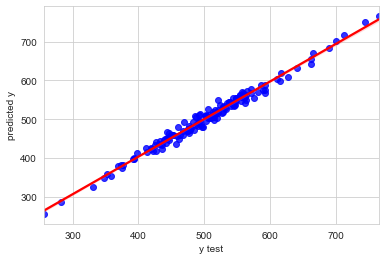

In [16]:
reg.predict(X_test)

ax = sns.regplot(x=y_test, y=reg.predict(X_test),
                scatter_kws={'color': 'blue'}, line_kws={'color':'red'});
ax.set(xlabel='y test', ylabel='predicted y');

In [17]:
# sample of predicted vs. actual amount spent

samp = pd.DataFrame({'Prediction': predictions, 'Actual': y_test}, index=None)
samp.sample(10)

,Prediction,Actual
180,513.777463,517.165136
310,478.440361,479.614812
481,479.900499,497.389558
307,439.891310,441.896632
36,350.213849,347.776927
226,537.174930,547.110982
274,447.527403,446.418673
251,399.794639,393.857371
240,412.542527,398.163469
416,507.165311,511.038786


### Conclusion and Insights of the Linear Model

In [18]:
coeff = pd.DataFrame(index=X.columns, columns=['Coefficients'], data=reg.coef_)
coeff

,Coefficients
Avg. Session Length,26.157811
Time on App,38.635474
Time on Website,0.893142
Length of Membership,60.871856


Berdasarkan koefisien, dimungkinkan untuk memprediksi - dengan akurasi 98%, kira-kira. - bahwa, dengan semua fitur lainnya diperbaiki, untuk setiap peningkatan unit dalam waktu yang dihabiskan di aplikasi, ada peningkatan USD 38,10 dalam 'Jumlah yang Dibelanjakan'.
Mempertimbangkan bahwa akan jauh lebih sulit untuk meningkatkan 'Lama Sesi Rata-Rata' (dan bahkan dapat menyebabkan pengalaman pelanggan yang lebih buruk) dan bahwa 'Panjang Keanggotaan' tidak dapat dirangsang secara langsung (hanya dengan berfokus pada layanan dan retensi pelanggan) dan hanya tumbuh seiring waktu, perusahaan harus fokus pada: 
*Mengembangkan lebih lanjut aplikasi seluler mereka, yang akan mengarah pada peningkatan waktu yang dihabiskan pelanggan untuk itu. Membuat survei dan melakukan analisis akar masalah untuk lebih memahami cara meningkatkan pengalaman situs web dan mengapa hal itu tidak menghasilkan penjualan serta aplikasi seluler mereka.*

### Clustering with K-Means

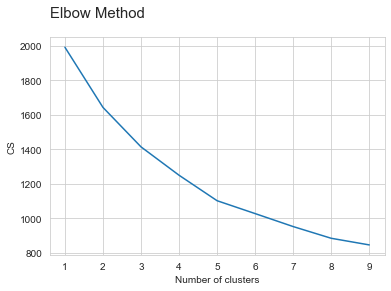

In [19]:
from sklearn.cluster import KMeans
clus = X

# elbow method

c = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(clus)
    c.append(km.inertia_)
plt.plot(range(1, 10), c);
plt.title('Elbow Method', loc='left', fontsize=15, pad=20);
plt.xlabel('Number of clusters');
plt.ylabel('CS');

In [20]:
# trying out with 5 different clusters

km = KMeans(n_clusters=5)
clus['Cluster'] = km.fit_predict(clus)
clus['Cluster'] = clus['Cluster'].astype('category')
clus.head(10)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Cluster
0,34.497268,12.655651,39.577668,4.082621,2
1,31.926272,11.109461,37.268959,2.664034,0
2,33.000915,11.330278,37.110597,4.104543,0
3,34.305557,13.717514,36.721283,3.120179,2
4,33.330673,12.795189,37.536653,4.446308,2
5,33.871038,12.026925,34.476878,5.493507,1
6,32.021596,11.366348,36.683776,4.685017,3
7,32.739143,12.351959,37.373359,4.434273,3
8,33.987773,13.386235,37.534497,3.273434,2
9,31.936549,11.814128,37.145168,3.202806,3


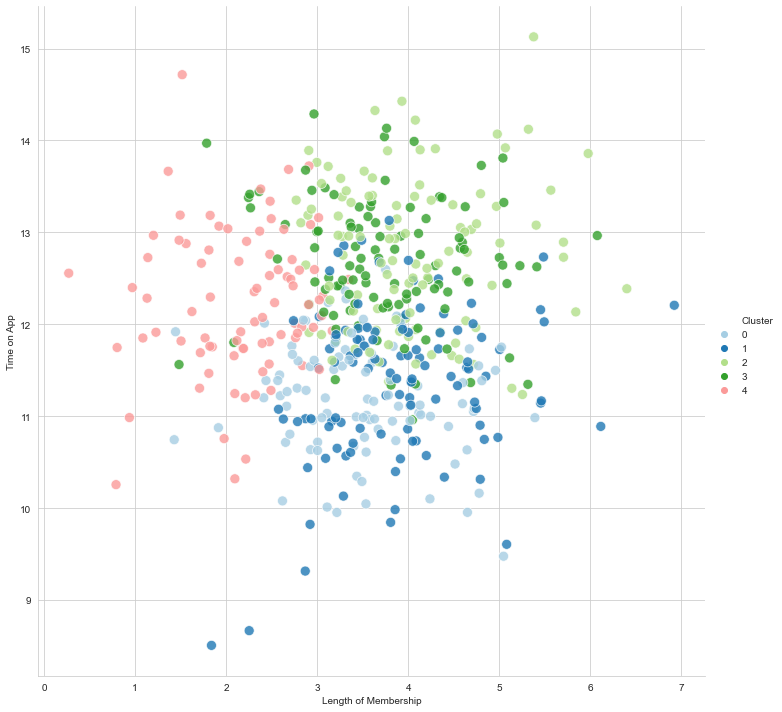

In [21]:
sns.relplot(x='Length of Membership', y='Time on App', hue='Cluster', data=clus, 
            height=10, alpha=.8, s=100, palette='Paired');

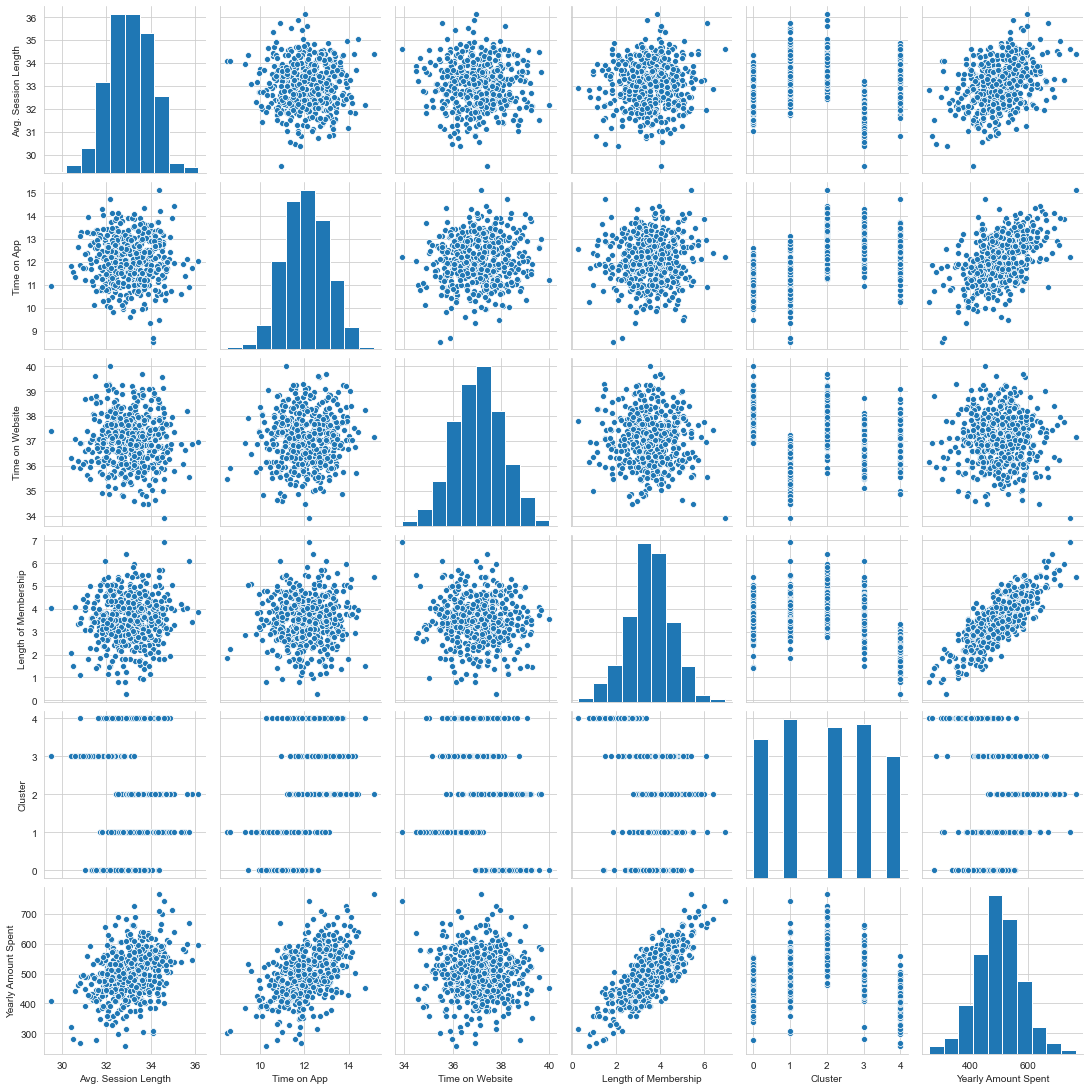

In [22]:
clus['Yearly Amount Spent'] = ecomm['Yearly Amount Spent']
sns.pairplot(clus);